In [1]:
import sys
import pickle
import matplotlib.pyplot as plt
import PyHEADTAIL

sys.path.append('../../../utils')
from coordinatesConversions import *
from cmpt_TuneSpreads import *

PyHEADTAIL v1.13.5




In [20]:
params = {'legend.fontsize': 20,
          'figure.figsize': (8, 7),
          'axes.labelsize': 25,
          'axes.titlesize': 21,
          'xtick.labelsize': 23,
          'ytick.labelsize': 23,
          'image.cmap': 'jet',
          'lines.linewidth': 2,
          'lines.markersize': 7,
          'font.family': 'sans-serif'}


plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update(params)
plt.close('all')

### Machine parameters, needed for the post process analysis

In [3]:
macroparticlenumber = 700**2
n_segments = 2
alpha_x = 0 * np.ones(n_segments)  
beta_x = 30.31164764 * np.ones(n_segments)
alpha_y = 0 * np.ones(n_segments)  
beta_y = 73.81671646 * np.ones(n_segments)

In [35]:
Qx_coherent_wakes = 0.1299951806410353
Qy_coherent_wakes = 0.1799900619901577

In [36]:
Qx_coherent_nowakes = 0.1299951672397874
Qy_coherent_nowakes = 0.1799906063619161

### Load the tunes for each particle as obtained from tracking

In [5]:
Qx_list = pickle.load(open('Qx_file.pkl', 'rb'))
Qy_list = pickle.load(open('Qy_file.pkl', 'rb'))

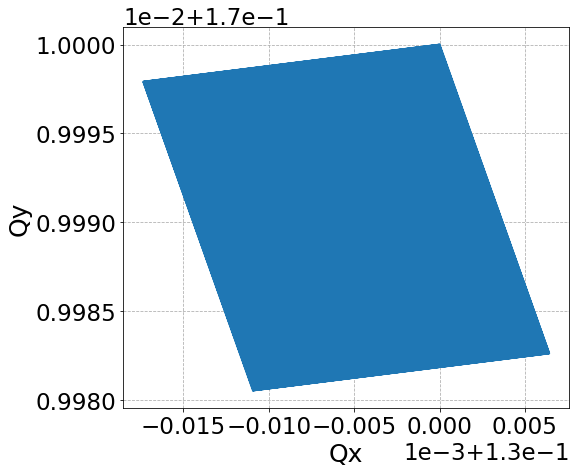

In [6]:
plt.plot(Qx_list, Qy_list, c='C0', ms=0.1)
plt.xlabel('Qx')
plt.ylabel('Qy')
plt.grid(linestyle='dashed')
plt.ticklabel_format(axis='y', style='', scilimits=(-2,-2), useOffset=0.17)
plt.ticklabel_format(axis='x', style='', scilimits=(-3,-3), useOffset=0.13)

### Load the bunch

1) Compute initial normalised coordinates

2) Compute initial actions

3) Apply the following condition:

\begin{equation}
\frac{J_x}{J_{x_{max}}} + \frac{J_y}{J_{y_{max}}} < 1
\end{equation}

Very low probability for the particles that don't meet this condition to exist (left bottom corner of the footprint above).

Using this condition we obtain the familiar triangular shape.

In [7]:
# Load the initial distribution to apply the condition in the initial positions
file2 = open(f'bunch', 'rb')
bunch = pickle.load(file2)
file2.close()

# Switch to action angle coordinates
x_n, xp_n = cmpt_normalised_coordinates(bunch.x, bunch.xp, beta_x[0], alpha_x[0])
y_n, yp_n = cmpt_normalised_coordinates(bunch.y, bunch.yp, beta_y[0], alpha_y[0])


Jx, Jy = cmpt_actions(x_n, xp_n), cmpt_actions(y_n, yp_n)
Jx_max, Jy_max = np.max(Jx), np.max(Jy)

Qx_list_good =[]
Qy_list_good=[]

for particle in range(macroparticlenumber):
    if Jx[particle]/Jx_max + Jy[particle]/Jy_max < 1:
        Qx_list_good.append(Qx_list[particle])
        Qy_list_good.append(Qy_list[particle])
        

### Plotting

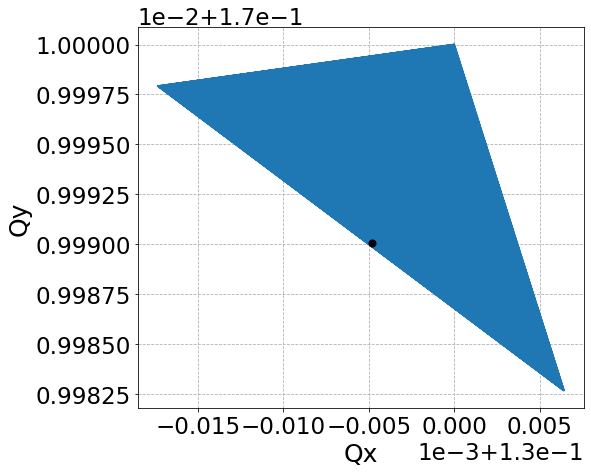

In [8]:
plt.plot(Qx_list_good, Qy_list_good, c='C0', ms=0.1)
plt.xlabel('Qx')
plt.ylabel('Qy')
plt.grid(linestyle='dashed')
plt.scatter(Qx_coherent, Qy_coherent, c='k', zorder=50)
plt.ticklabel_format(axis='y', style='', scilimits=(-2,-2), useOffset=0.17)
plt.ticklabel_format(axis='x', style='', scilimits=(-3,-3), useOffset=0.13)


### Plot the incoherent tune spread without the wakefields

In [31]:
# detuning coefficients in (1/m)
app_x = 153.8183853  #2.4705e-15 #4e-11
app_xy = -416.0175086  #-0*2.25e-11
app_y = -50.03699877 #-7.31-14 #0*3e-11

In [32]:
Qx_incoherent_analytical = []
Qy_incoherent_analytical = []
for particle in range(macroparticlenumber):
    if Jx[particle]/Jx_max + Jy[particle]/Jy_max < 1:
        Qx_incoherent_analytical.append(amplitude_detuning_x(Jx[particle], Jy[particle], app_x, app_xy))
        Qy_incoherent_analytical.append(amplitude_detuning_y(Jx[particle], Jy[particle], app_y, app_xy))
print(len(Qy_incoherent_analytical))

244650


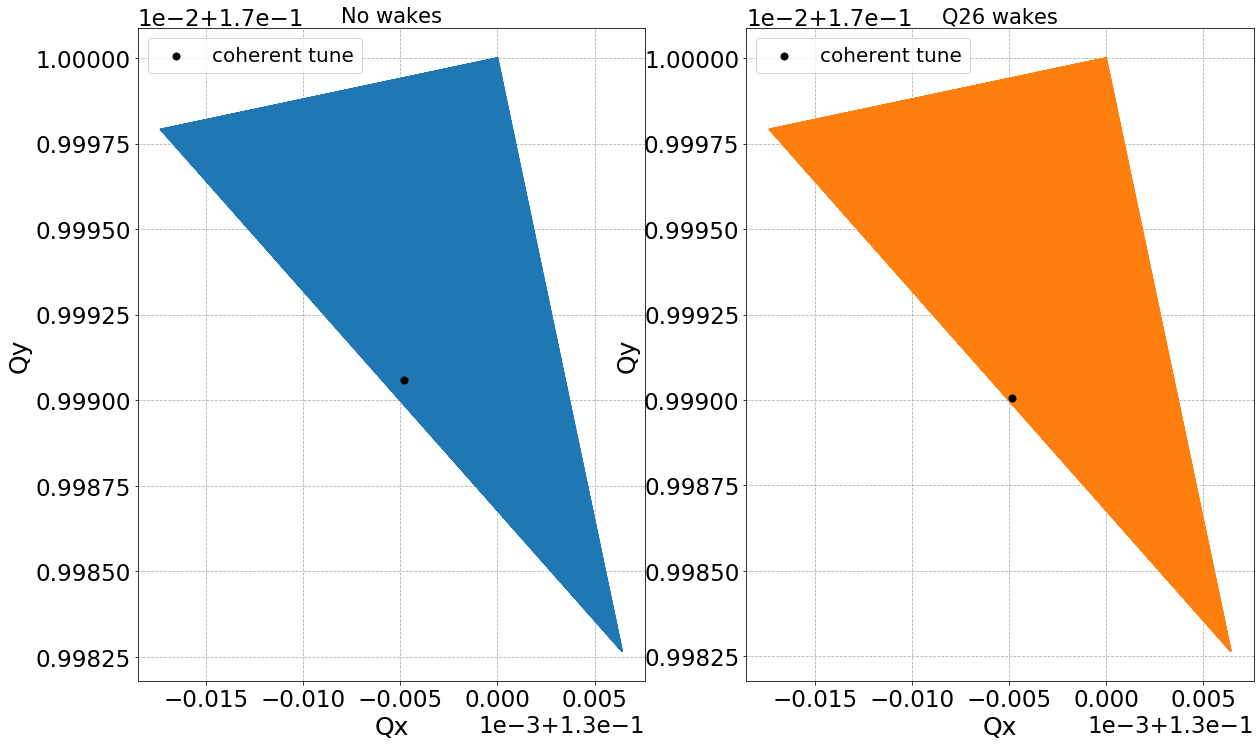

In [47]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,12))
ax1.plot(0.13+np.array(Qx_incoherent_analytical), 0.18+np.array(Qy_incoherent_analytical), c='C0', ms=0.1)
ax2.plot(Qx_list_good, Qy_list_good, c='C1', ms=0.1)

ax1.set_xlabel('Qx')
ax1.set_ylabel('Qy')
ax1.grid(linestyle='dashed')
ax1.scatter(Qx_coherent_nowakes, Qy_coherent_nowakes, c='k', zorder=50, label='coherent tune')
ax1.ticklabel_format(axis='y', style='', scilimits=(-2,-2), useOffset=0.17)
ax1.ticklabel_format(axis='x', style='', scilimits=(-3,-3), useOffset=0.13)
ax1.legend()
ax1.set_title('No wakes')


ax2.set_xlabel('Qx')
ax2.set_ylabel('Qy')
ax2.grid(linestyle='dashed')
ax2.scatter(Qx_coherent_wakes, Qy_coherent_wakes, c='k', zorder=50, label='coherent tune')
ax2.ticklabel_format(axis='y', style='', scilimits=(-2,-2), useOffset=0.17)
ax2.ticklabel_format(axis='x', style='', scilimits=(-3,-3), useOffset=0.13)
ax2.legend()
ax2.set_title('Q26 wakes')

savefig = False

if savefig:
    plt.savefig('SPS_incoherentTune_wakesVSnoWakes.png', bbox_inches='tight')

No handles with labels found to put in legend.


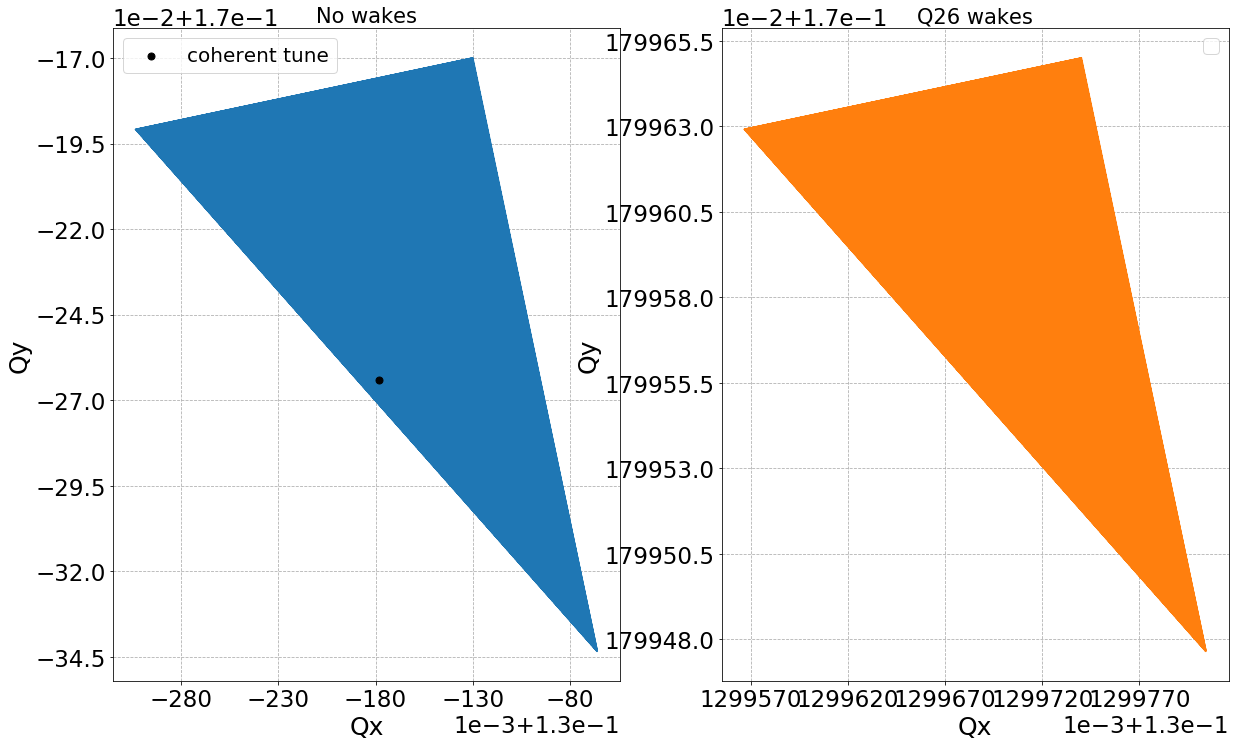

In [58]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,12))
ax1.plot(np.array(Qx_incoherent_analytical)*1e4, np.array(Qy_incoherent_analytical)*1e4, c='C0', ms=0.1)
ax2.plot((np.array(Qx_list_good))*1e4-0.13, (np.array(Qy_list_good))*1e4-0.18, c='C1', ms=0.1)

ax1.set_xlabel('Qx')
ax1.set_ylabel('Qy')
ax1.grid(linestyle='dashed')
ax1.scatter((Qx_coherent_nowakes-0.13)*1e4, (Qy_coherent_nowakes-0.18)*1e4, c='k', zorder=50, label='coherent tune')
ax1.ticklabel_format(axis='y', style='', scilimits=(-2,-2), useOffset=0.17)
ax1.ticklabel_format(axis='x', style='', scilimits=(-3,-3), useOffset=0.13)
ax1.legend()
ax1.set_title('No wakes')

ax2.set_xlabel('Qx')
ax2.set_ylabel('Qy')
ax2.grid(linestyle='dashed')
#ax2.scatter((Qx_coherent_wakes-0.13)*1e4, (Qy_coherent_wakes-0.18)*1e4, c='k', zorder=50, label='coherent tune')
ax2.ticklabel_format(axis='y', style='', scilimits=(-2,-2), useOffset=0.17)
ax2.ticklabel_format(axis='x', style='', scilimits=(-3,-3), useOffset=0.13)
ax2.legend()
ax2.set_title('Q26 wakes')


savefig = False

if savefig:
    plt.savefig('SPS_incoherentTune_wakesVSnoWakes.png', bbox_inches='tight')